In [1]:
import pickle
import random

from PIL import ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import data
from vocab import VocabTagger
from game import GuessWhatGame

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
split = 'valid'
small = True

with open(data.get_processed_file('game', split, small), 'rb') as f:
    data_imgs, data_raw_objs, data_all_cats, data_all_spatial = pickle.load(f)

def get_example(i):
    return data_imgs[i], data_raw_objs[i], data_all_cats[i], data_all_spatial[i]

vocab_tagger = VocabTagger()

Correct obj index: 1


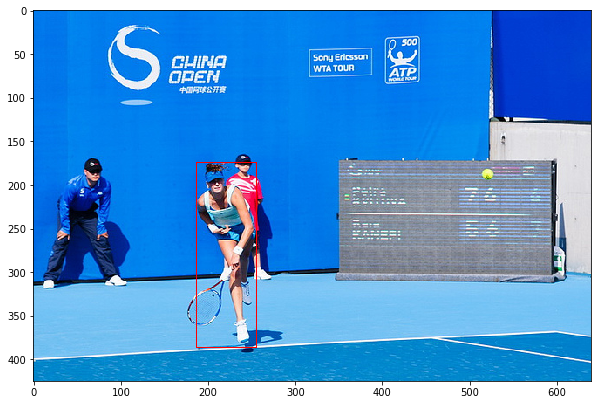

In [3]:
i = 2
img, raw_objs, obj_cats, obj_spatial = get_example(i)

num_objs = len(obj_cats)
correct_obj = random.randint(0, num_objs - 1)

print('Correct obj index: {}'.format(correct_obj))

plt.figure()

x, y, width, height = raw_objs[correct_obj]['bbox']
draw = ImageDraw.Draw(img)
draw.rectangle([x, y, x + width, y + height], fill=None, outline="#ff0000")

plt.imshow(img)

game = GuessWhatGame(img, obj_cats, obj_spatial)

In [4]:
answer = None
for i in range(10):
    question_ids = game.question(answer)
    print(vocab_tagger.get_question_tokens(question_ids))
    answer_id = game.answer(question_ids)
    print(vocab_tagger.get_answer(answer_id))

['is', 'it', 'the', 'airplane', '<?>']
<No>
['ok', 'more', 'spots', '<?>']
<No>
['it', 'is', 'is', 'cut', 'visible', '<?>']
<No>
['is', 'it', 'in', 'the', 'girl', '<?>']
<Yes>
['is', 'it', '<?>']
<Yes>
['is', 'it', 'one', 'of', '<unk>', '<?>']
<Yes>
['does', 'it', 'the', 'camera', '<?>']
<Yes>
['is', 'it', 'on', 'the', 'the', 'cat', '<?>']
<No>
['is', 'it', 'part', '<?>']
<No>
['is', 'it', 'the', 'shelf', '<?>']
<No>


In [5]:
pred_idx = game.guess()
print('Number of objs: {}'.format(num_objs))
print('Correct obj index: {}'.format(correct_obj))
print('Guessed obj index: {}'.format(pred_idx))

Number of objs: 5
Correct obj index: 1
Guessed obj index: 2
